Dataset Link: https://www.kaggle.com/datasets/hanselliott/toxic-plant-classification

In [10]:
from torchvision import transforms
from PIL import Image
import torch
import os
import pandas as pd
from main import ModelLoader
import matplotlib.pyplot as plt

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
def test_the_model(image_path:str):
    classes = ["nontoxic", "toxic"]
    metadata = pd.read_csv("./tpc-imgs/full_metadata.csv")
    metadata = metadata[['path', 'toxicity']]
    
    checker = os.path.normpath(f"../input/toxic-plant-classification/{image_path}").replace("\\", "/")
    y_true = int(metadata[metadata["path"] == checker]["toxicity"].iloc[0])

    model = ModelLoader(classes)
    model = model.efficientnet_b3()
    model.load_state_dict(torch.load("./models/binary-classification/model.pth"), strict=False)

    image = transforms.ToTensor()(Image.open(image_path)).unsqueeze(0).to(device)
    
    model.to(device)
    model.eval()

    with torch.no_grad():
        logit = model(image)
        y_pred = torch.argmax(logit, dim=1)

        print("Predicted:", classes[y_pred])
        print("Real value:", classes[y_true])

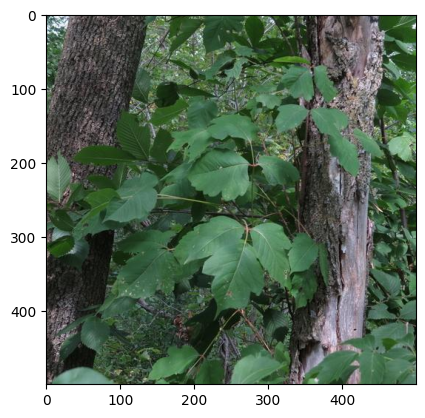

In [15]:
image_path = "./tpc-imgs/toxic_images/002/028.jpg"
plt.imshow(Image.open(image_path))
plt.show()

In [16]:
test_the_model(image_path)

Predicted: toxic
Real value: toxic
